In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

Let's try read in an image!
[Alt text](dartboard-1.jpg)

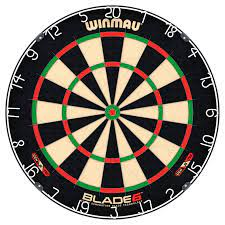

In [3]:
from IPython import display
display.Image("dartboard.jpg")

In [4]:
dart_img = cv2.imread("dartboard.jpg", 0)
print(dart_img)
print(dart_img.shape)
print(dart_img.dtype)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(225, 225)
uint8


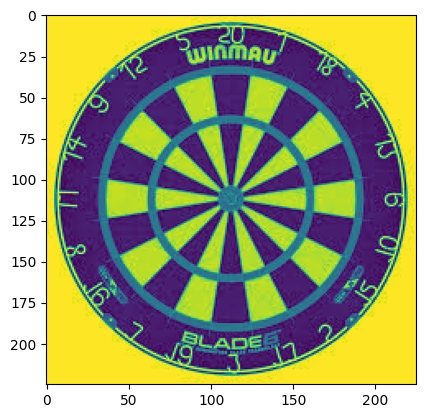

In [5]:
plt.imshow(dart_img)

Image alignment

In [17]:
dart_tilt_img = cv2.imread("real_dartboard.png", 0)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(dart_img, None)
keypoints2, descriptors2 = orb.detectAndCompute(dart_tilt_img, None)

dart_display = cv2.drawKeypoints(dart_img, keypoints1, outImage=np.array([]), color = (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
dart_tilt_display = cv2.drawKeypoints(dart_tilt_img, keypoints2, outImage=np.array([]), color = (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

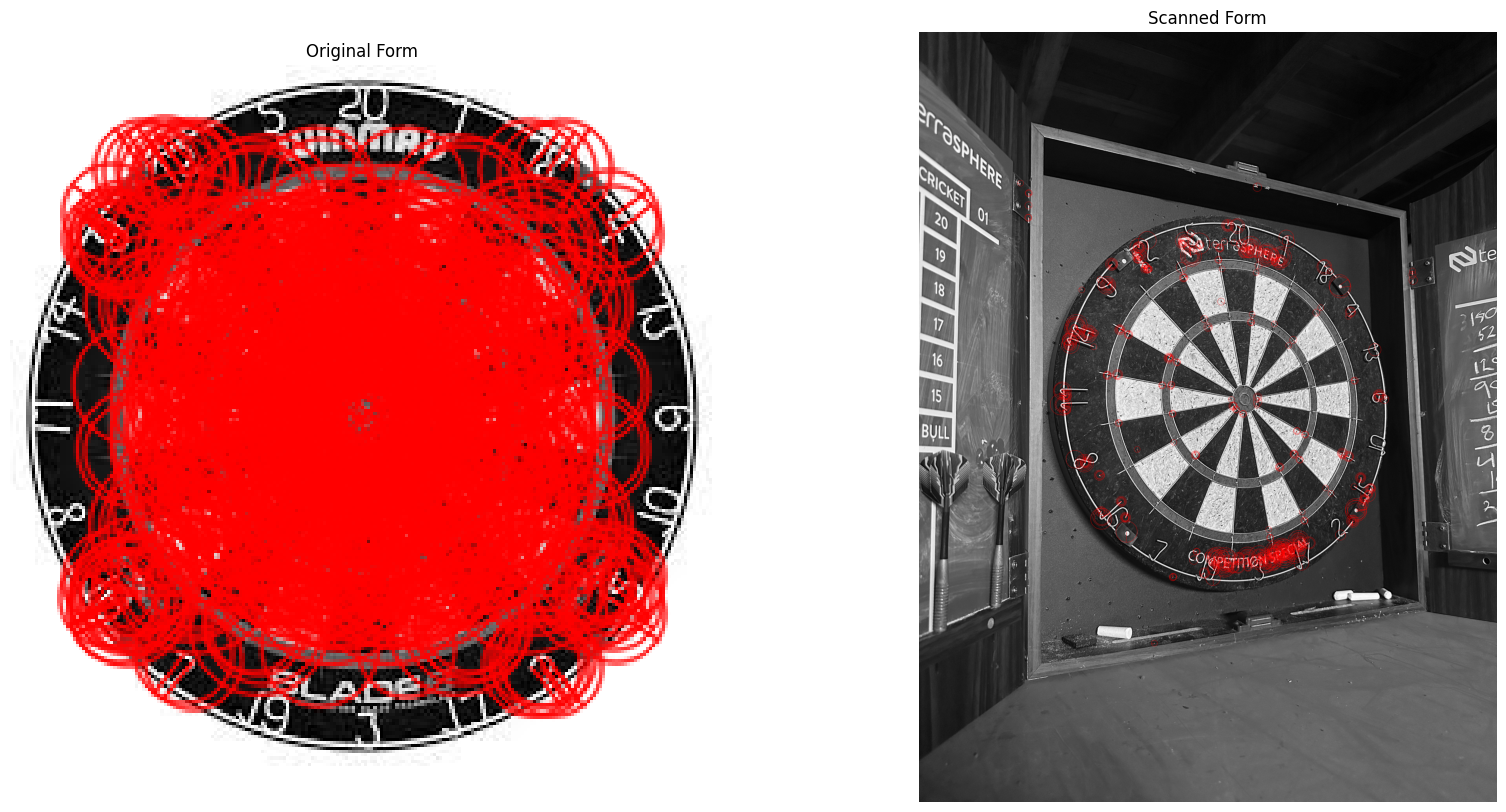

In [18]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(dart_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(dart_tilt_display); plt.title("Scanned Form");

In [19]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Converting to list for sorting as tuples are immutable objects.
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Original Form')

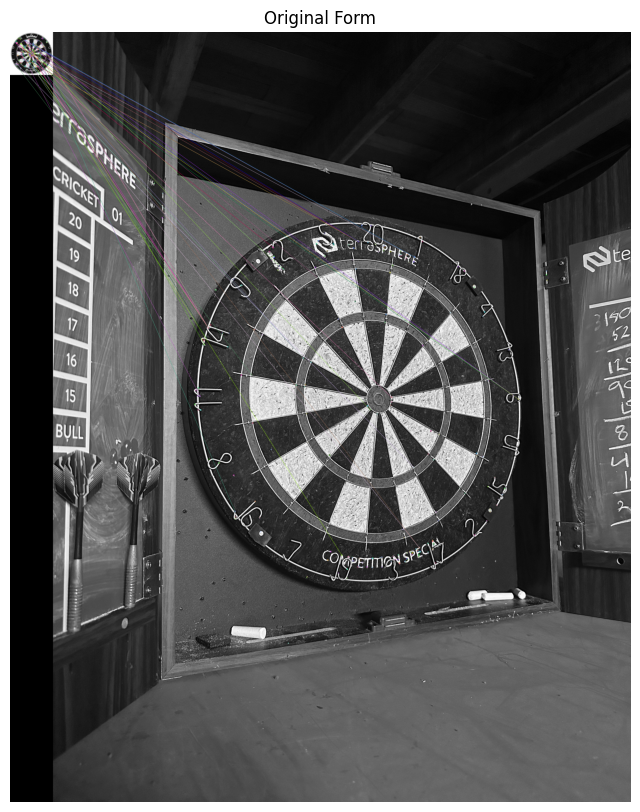

In [20]:
# Draw top matches
im_matches = cv2.drawMatches(dart_img, keypoints1, dart_tilt_img, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")

In [21]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Scanned Form')

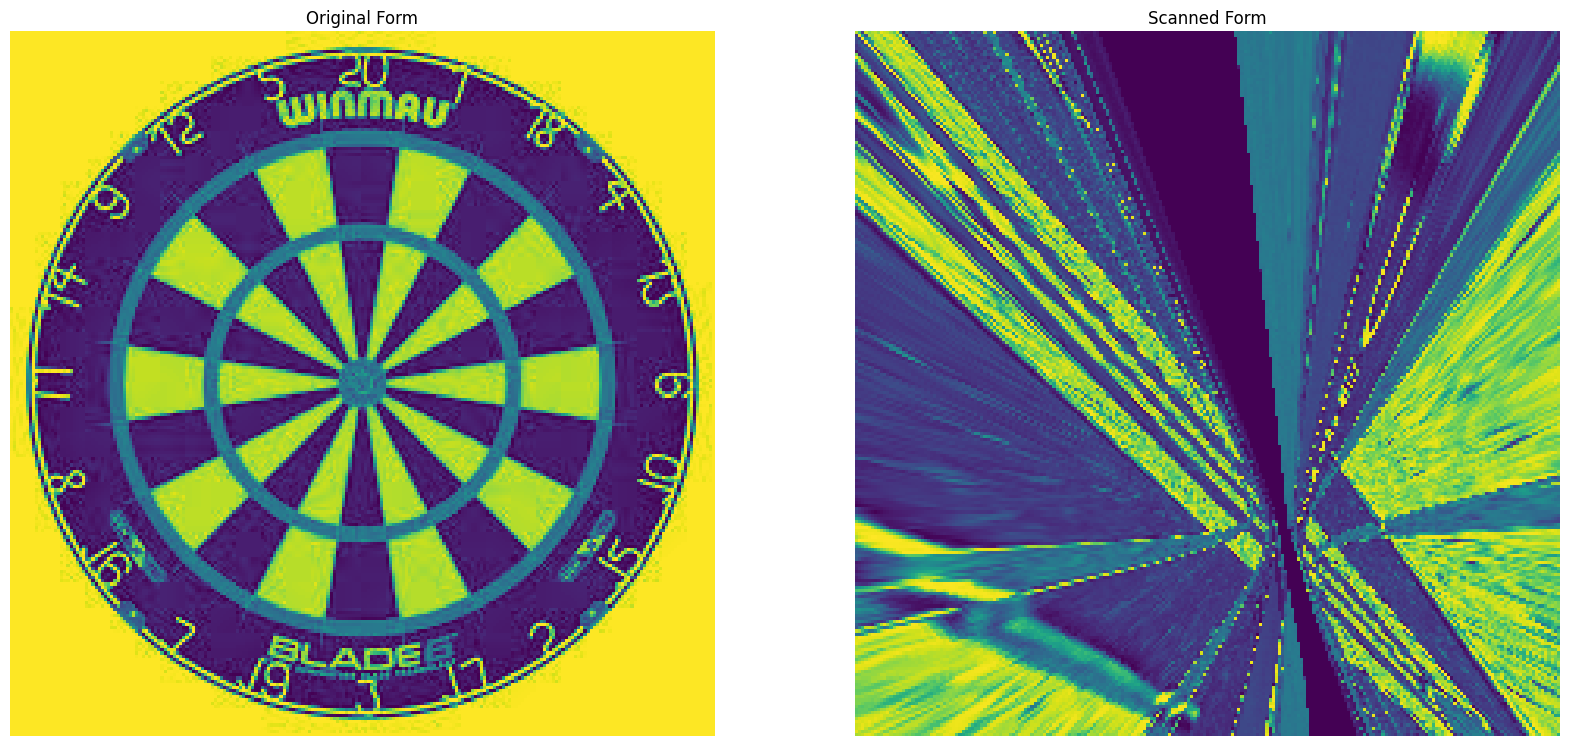

In [22]:
# Use homography to warp image
height, width = dart_img.shape
im2_reg = cv2.warpPerspective(dart_tilt_img, h, (width, height))

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(dart_img);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")

----------------------------------------------------------------------

In [ ]:
dart_img = cv2.imread("real_dartboard.png", 0)
gray_blur = cv2.GaussianBlur(dart_tilt_img, (31,31), 0)
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)


if circles is not None:
    circles = np.uint16(np.around(circles))
    print(circles)
    for i in circles[0, :]:
        center = (i[0], i[1])  # x, y of the dartboard's center
        radius = i[2]
        # Draw the outer circle
        cv2.circle(dart_img, center, radius, (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(dart_img, center, 2, (0, 0, 255), 3)
        break  # Assuming the first circle detected is the dartboard for simplicity


# Display the result
cv2.imshow('Detected Circles', dart_img)
cv2.waitKey(0)

: 